In [9]:
import scipy as sc
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### for each dataset: dataframe with 3 columns: lp, io, k

In [10]:
import pickle

In [26]:
weights_bs = pickle.load(
    open("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output/uc-dialogue-reduced_ws.pickle", "rb")
)

In [27]:
weights_lp = pickle.load(
    open("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_ws.pickle", "rb")
)

In [21]:
def _to_dataframe(scv_lp:np.array, scv_io:np.array, celltype):
    # for one celltype!
    def flat_list(scv:np.array):
        w = []
        for c in range(scv.shape[1]):
            w.append([x[c] for x in scv])
        scv_flat = [item for sublist in w for item in sublist]
        return scv_flat

    scv_flat_lp = flat_list(scv_lp)
    scv_flat_io = flat_list(scv_io)
    K = []
    for k in range(scv_lp.shape[1]):
        K.append(scv_lp.shape[0]* [k])
    K_flat = [item for sublist in K for item in sublist]

    Celltype = [celltype] * len(scv_flat_lp)

    correlation_dataframe = pd.DataFrame({"linear programming":scv_flat_lp, "iterative optimization":scv_flat_io, "MCP":K_flat, "celltype":Celltype})
    return correlation_dataframe
    

In [28]:
weights_lp = list(weights_lp.values())
weights_bs = list(weights_bs.values())

In [29]:
celltype0 = _to_dataframe(weights_lp[0], weights_bs[0], "epithelial")
celltype1 = _to_dataframe(weights_lp[1], weights_bs[1], "fibroblast")
celltype2 = _to_dataframe(weights_lp[2], weights_bs[2], "immune")
my_data = celltype0.append(celltype1)
data_to_plot = my_data.append(celltype2)

/gpfs/scratch/pn25xo/gobi003/gobi003/ipykernel_18411/2812303863.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_data = celltype0.append(celltype1)
/gpfs/scratch/pn25xo/gobi003/gobi003/ipykernel_18411/2812303863.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_to_plot = my_data.append(celltype2)


In [30]:
data_to_plot

linear programming  iterative optimization  MCP    celltype
0              0.223217                0.169557    0  epithelial
1              0.345037                0.501905    0  epithelial
2             -0.390935               -0.577746    0  epithelial
3              0.009323                0.000000    0  epithelial
4             -0.137479               -0.054566    0  epithelial
..                  ...                     ...  ...         ...
145            0.068068                0.000000    2      immune
146           -0.053415                0.000000    2      immune
147           -0.085416                0.016148    2      immune
148            0.013931               -0.000000    2      immune
149           -0.059785               -0.000000    2      immune

[450 rows x 4 columns]

In [31]:
data_to_plot_mcp_0 = data_to_plot[data_to_plot["MCP"]==0]

In [32]:
data_to_plot_mcp_0

linear programming  iterative optimization  MCP    celltype
0             0.223217                0.169557    0  epithelial
1             0.345037                0.501905    0  epithelial
2            -0.390935               -0.577746    0  epithelial
3             0.009323                0.000000    0  epithelial
4            -0.137479               -0.054566    0  epithelial
..                 ...                     ...  ...         ...
45            0.059550                0.000000    0      immune
46           -0.009909                0.000000    0      immune
47           -0.054618               -0.000000    0      immune
48            0.069544                0.031973    0      immune
49           -0.058596               -0.000000    0      immune

[150 rows x 4 columns]

In [43]:
data_to_plot_mcp_0["MCP"] = "MCP0"

/gpfs/scratch/pn25xo/gobi003/gobi003/ipykernel_18411/750544527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot_mcp_0["MCP"] = "MCP0"


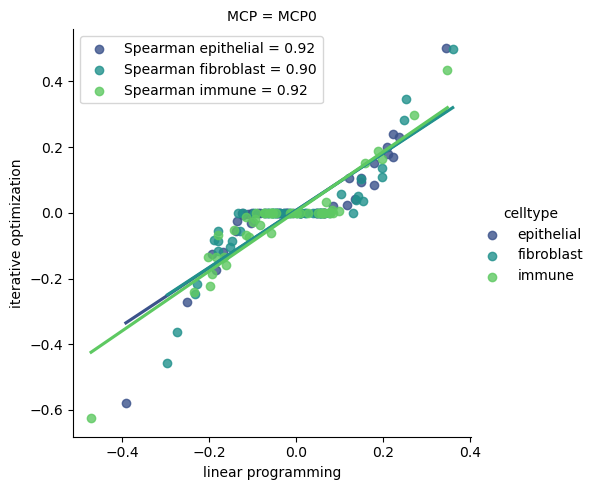

In [48]:
scv_cor = sns.lmplot(x="linear programming", y="iterative optimization",hue="celltype",ci=None,col="MCP", data=data_to_plot_mcp_0, palette="viridis")
for ax, k in zip(scv_cor.axes.flat, scv_cor.col_names):

    r_epi, pvalue = sc.stats.spearmanr(data_to_plot_mcp_0[(data_to_plot_mcp_0["celltype"]=="epithelial")]['iterative optimization'], data_to_plot_mcp_0[(data_to_plot_mcp_0["celltype"]=="epithelial")]["linear programming"])
    r_fib, pvalue = sc.stats.spearmanr(data_to_plot_mcp_0[(data_to_plot_mcp_0["celltype"]=="fibroblast")]['iterative optimization'], data_to_plot_mcp_0[(data_to_plot_mcp_0["celltype"]=="fibroblast")]["linear programming"])
    r_im, pvalue = sc.stats.spearmanr(data_to_plot_mcp_0[(data_to_plot_mcp_0["celltype"]=="immune")]['iterative optimization'], data_to_plot_mcp_0[(data_to_plot_mcp_0["celltype"]=="immune")]["linear programming"])

    ax.collections[0].set_label(f'Spearman epithelial = {r_epi:.2f}')
    ax.collections[1].set_label(f'Spearman fibroblast = {r_fib:.2f}')
    ax.collections[2].set_label(f'Spearman immune = {r_im:.2f}')
    ax.legend()

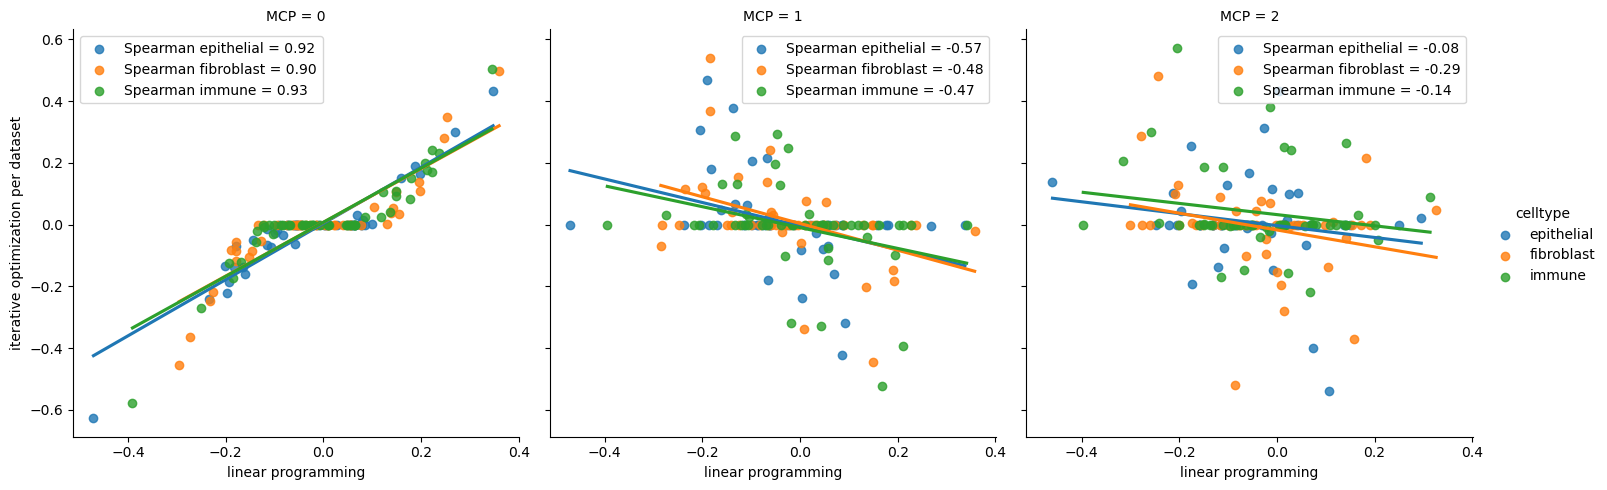

In [46]:
scv_cor = sns.lmplot(x="linear programming", y="iterative optimization per dataset", col="MCP", hue="celltype",ci=None, data=data_to_plot)
#add overall title to replot
#scv_cor.fig.suptitle('correlation of sparce canonical variates',y=1.05, fontsize=17)

for ax, k in zip(scv_cor.axes.flat, scv_cor.col_names):
    r_epi, pvalue = sc.stats.spearmanr(data_to_plot[(data_to_plot["MCP"]==k)&(data_to_plot["celltype"]=="epithelial")]['iterative optimization per dataset'], data_to_plot[(data_to_plot["MCP"]==k) & (data_to_plot["celltype"]=="epithelial")]["linear programming"])
    r_fib, pvalue = sc.stats.spearmanr(data_to_plot[(data_to_plot["MCP"]==k)&(data_to_plot["celltype"]=="fibroblast")]['iterative optimization per dataset'], data_to_plot[(data_to_plot["MCP"]==k) & (data_to_plot["celltype"]=="fibroblast")]["linear programming"])
    r_im, pvalue = sc.stats.spearmanr(data_to_plot[(data_to_plot["MCP"]==k)&(data_to_plot["celltype"]=="immune")]['iterative optimization per dataset'], data_to_plot[(data_to_plot["MCP"]==k) & (data_to_plot["celltype"]=="immune")]["linear programming"])
    
    ax.collections[0].set_label(f'Spearman epithelial = {r_epi:.2f}')
    ax.collections[1].set_label(f'Spearman fibroblast = {r_fib:.2f}')
    ax.collections[2].set_label(f'Spearman immune = {r_im:.2f}')
    ax.legend()

### permuted data

In [62]:
weights_io_efi = pickle.load(
    open("pmd-permute/bs/uc-dialogue-reduced_ws_('epithelial', 'fibroblast', 'immune').pickle", "rb")
)

In [63]:
weights_io_ife = pickle.load(
    open("pmd-permute/bs/uc-dialogue-reduced_ws_('immune', 'fibroblast', 'epithelial').pickle", "rb")
)

In [69]:
celltype0_ = _to_dataframe(weights_io_ife["epithelial"], weights_io_efi["epithelial"], "epithelial")
celltype1_ = _to_dataframe(weights_io_ife["fibroblast"], weights_io_efi["fibroblast"], "fibroblast")
celltype2_ = _to_dataframe(weights_io_ife["immune"], weights_io_efi["immune"], "immune")
my_data_ = celltype0_.append(celltype1_)
data_to_plot_ = my_data_.append(celltype2_)

/gpfs/scratch/pn25xo/gobi003/gobi003/ipykernel_6166/3292233575.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_data_ = celltype0_.append(celltype1_)
/gpfs/scratch/pn25xo/gobi003/gobi003/ipykernel_6166/3292233575.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_to_plot_ = my_data_.append(celltype2_)


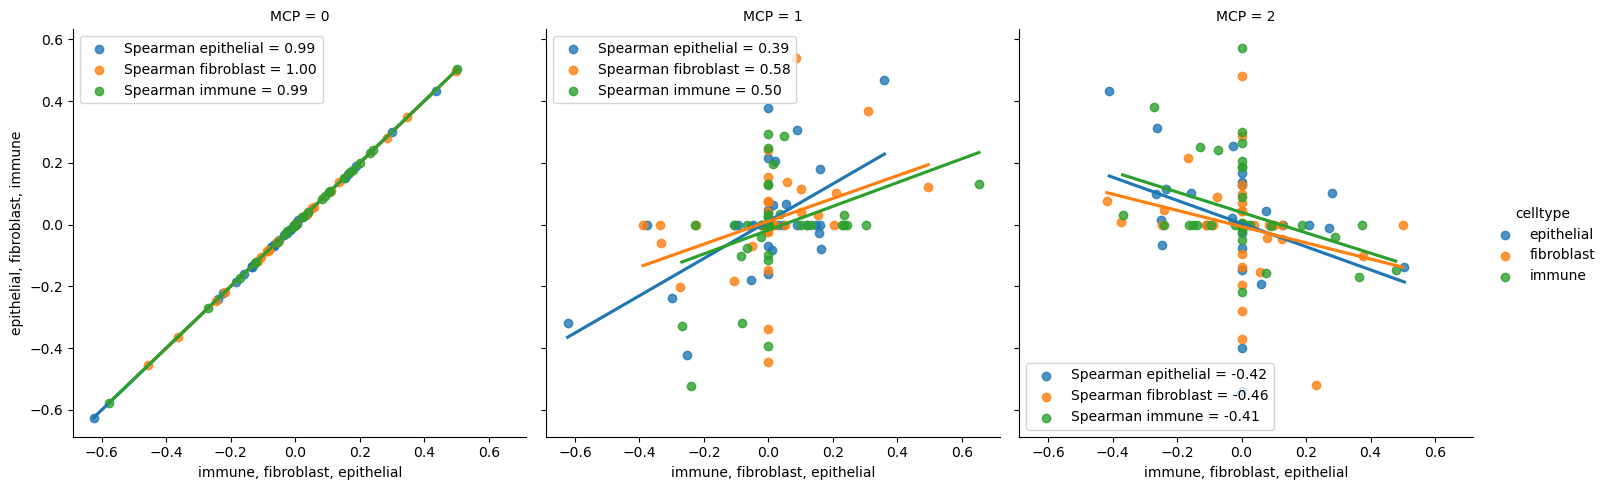

In [71]:
scv_cor = sns.lmplot(x="immune, fibroblast, epithelial", y="epithelial, fibroblast, immune", col="MCP", hue="celltype",ci=None, data=data_to_plot_)
#add overall title to replot
#scv_cor.fig.suptitle('correlation of sparce canonical variates',y=1.05, fontsize=17)

for ax, k in zip(scv_cor.axes.flat, scv_cor.col_names):
    r_epi, pvalue = sc.stats.spearmanr(data_to_plot_[(data_to_plot_["MCP"]==k)&(data_to_plot_["celltype"]=="epithelial")]["epithelial, fibroblast, immune"], data_to_plot_[(data_to_plot_["MCP"]==k) & (data_to_plot_["celltype"]=="epithelial")]["immune, fibroblast, epithelial"])
    r_fib, pvalue = sc.stats.spearmanr(data_to_plot_[(data_to_plot_["MCP"]==k)&(data_to_plot_["celltype"]=="fibroblast")]["epithelial, fibroblast, immune"], data_to_plot_[(data_to_plot_["MCP"]==k) & (data_to_plot_["celltype"]=="fibroblast")]["immune, fibroblast, epithelial"])
    r_im, pvalue = sc.stats.spearmanr(data_to_plot_[(data_to_plot_["MCP"]==k)&(data_to_plot_["celltype"]=="immune")]["epithelial, fibroblast, immune"], data_to_plot_[(data_to_plot_["MCP"]==k) & (data_to_plot_["celltype"]=="immune")]["immune, fibroblast, epithelial"])
    
    ax.collections[0].set_label(f'Spearman epithelial = {r_epi:.2f}')
    ax.collections[1].set_label(f'Spearman fibroblast = {r_fib:.2f}')
    ax.collections[2].set_label(f'Spearman immune = {r_im:.2f}')
    ax.legend()